In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
import tensorflow.keras as tk
mnist = tk.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

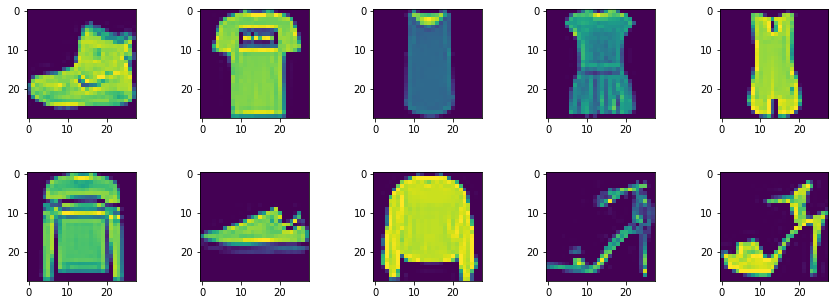

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(15,5))          
ax = axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))             
plt.subplots_adjust(hspace=0.5)                                    
plt.show()

In [6]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255
X_train_scaled.min(),X_train_scaled.max(),X_test_scaled.min(),X_test_scaled.max()

(0.0, 1.0, 0.0, 1.0)

# MODEL 1

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:

history= model.fit(X_train_scaled,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 12s 3ms/step - loss: 0.5435 - accuracy: 0.8117 - val_loss: 0.4371 - val_accuracy: 0.8506
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3954 - accuracy: 0.8596 - val_loss: 0.3950 - val_accuracy: 0.8597
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3543 - accuracy: 0.8739 - val_loss: 0.3656 - val_accuracy: 0.8692
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3313 - accuracy: 0.8800 - val_loss: 0.3723 - val_accuracy: 0.8681
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.3131 - accuracy: 0.8860 - val_loss: 0.3427 - val_accuracy: 0.8773
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2941 - accuracy: 0.8921 - val_loss: 0.3544 - val_accuracy: 0.8761
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2820 - accuracy: 0.8982 - val_loss: 0.3531 - val_accuracy: 0.8747
Epoch

In [11]:
model.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3513 - accuracy: 0.8787


[0.3513078987598419, 0.8787000179290771]

In [12]:
model.predict(X_test_scaled)

313/313 [==============================] - 1s 1ms/step


array([[8.1915432e-06, 3.3664382e-08, 2.9200286e-05, ..., 8.5482098e-02,
        4.2509630e-05, 8.7573761e-01],
       [7.9663594e-05, 2.4060975e-10, 9.8660129e-01, ..., 3.4287745e-17,
        1.5483882e-09, 5.8697811e-14],
       [4.9350786e-07, 9.9999952e-01, 4.1862345e-09, ..., 3.7764752e-17,
        7.8513529e-11, 3.5443578e-16],
       ...,
       [6.5520010e-04, 3.2465093e-09, 1.9109152e-04, ..., 4.1973627e-07,
        9.9885941e-01, 5.2379598e-09],
       [9.3136919e-07, 9.9981588e-01, 1.2388305e-07, ..., 3.6972304e-11,
        4.1511772e-08, 1.8735802e-10],
       [4.2705487e-05, 1.0198499e-05, 1.3161244e-04, ..., 8.1946505e-03,
        1.2432428e-03, 3.4781984e-05]], dtype=float32)

In [13]:
y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 0s 1ms/step


In [14]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
np.argmax(model.predict(X_test_scaled), axis=-1)

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

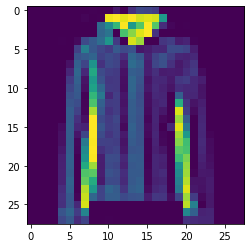

In [86]:
plt.imshow(X_test_scaled[6])

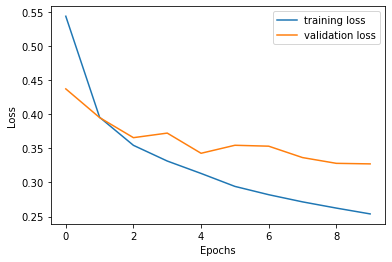

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("training loss","validation loss"))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

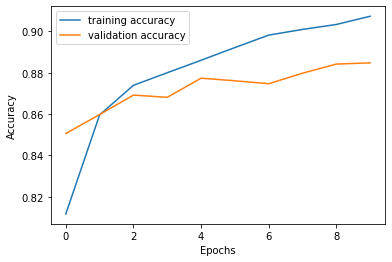

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("training accuracy","validation accuracy"))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Text(123.0, 0.5, 'Actual')

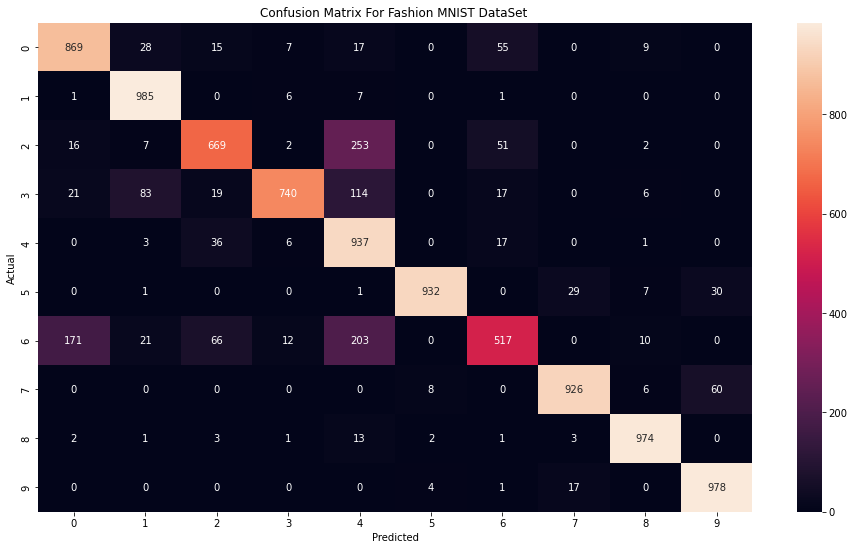

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)
s=sns.heatmap(cm, annot=True, fmt='d')
s.set_title('Confusion Matrix For Fashion MNIST DataSet ')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [21]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1000
           1       0.87      0.98      0.93      1000
           2       0.83      0.67      0.74      1000
           3       0.96      0.74      0.83      1000
           4       0.61      0.94      0.74      1000
           5       0.99      0.93      0.96      1000
           6       0.78      0.52      0.62      1000
           7       0.95      0.93      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



In [22]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_labels,average='micro')

0.8527

In [23]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_labels,average='micro')

0.8527

In [24]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_labels,average='micro')

0.8527

# MODEL 2

In [25]:
model_2 = Sequential()
model_2.add(Flatten(input_shape=(28,28)))
model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(10,activation='softmax'))

In [26]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
model_2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
history= model_2.fit(X_train_scaled,y_train,batch_size=64,epochs=20,verbose=1,validation_split=0.2)


Epoch 1/20
750/750 [==============================] - 8s 6ms/step - loss: 0.5358 - accuracy: 0.8149 - val_loss: 0.4201 - val_accuracy: 0.8519
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3943 - accuracy: 0.8599 - val_loss: 0.4905 - val_accuracy: 0.8353
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3568 - accuracy: 0.8712 - val_loss: 0.3615 - val_accuracy: 0.8728
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3288 - accuracy: 0.8794 - val_loss: 0.3428 - val_accuracy: 0.8759
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.3120 - accuracy: 0.8857 - val_loss: 0.3260 - val_accuracy: 0.8841
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2939 - accuracy: 0.8914 - val_loss: 0.3366 - val_accuracy: 0.8792
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.2795 - accuracy: 0.8970 - val_loss: 0.3387 - val_accuracy: 0.8778
Epoch 

In [29]:
model_2.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8778


[0.36211609840393066, 0.8777999877929688]

In [30]:
model_2.predict(X_test_scaled)

313/313 [==============================] - 2s 1ms/step


array([[5.41659233e-08, 4.46878645e-11, 5.22666177e-08, ...,
        2.01893486e-02, 7.61116183e-08, 9.78721142e-01],
       [2.37111872e-05, 8.47500984e-14, 9.98883069e-01, ...,
        1.00590406e-14, 5.28991304e-12, 6.17450912e-18],
       [5.94184861e-08, 1.00000000e+00, 1.51935566e-13, ...,
        2.43487296e-26, 2.54901758e-13, 2.04161113e-19],
       ...,
       [1.22680547e-06, 6.17750276e-14, 1.18339074e-06, ...,
        1.04483658e-10, 9.99994636e-01, 2.67845438e-14],
       [6.84695012e-09, 9.99998808e-01, 2.00322484e-11, ...,
        1.24850814e-15, 5.45611911e-08, 1.69025086e-10],
       [5.73629995e-06, 3.88003407e-10, 2.18002825e-07, ...,
        6.10448304e-04, 4.33969262e-06, 1.08828935e-07]], dtype=float32)

In [31]:
y_pred_2=model_2.predict(X_test).round(2)

313/313 [==============================] - 0s 950us/step


In [32]:
y_pred_2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
np.argmax(model_2.predict(X_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

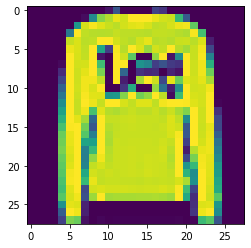

In [34]:
plt.imshow(X_test_scaled[1])

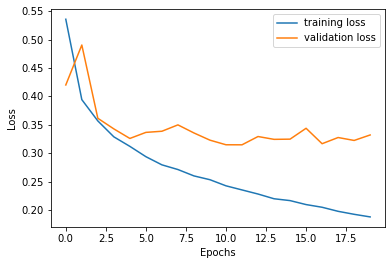

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("training loss","validation loss"))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

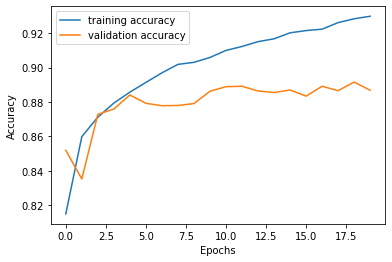

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("training accuracy","validation accuracy"))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

Text(123.0, 0.5, 'Actual')

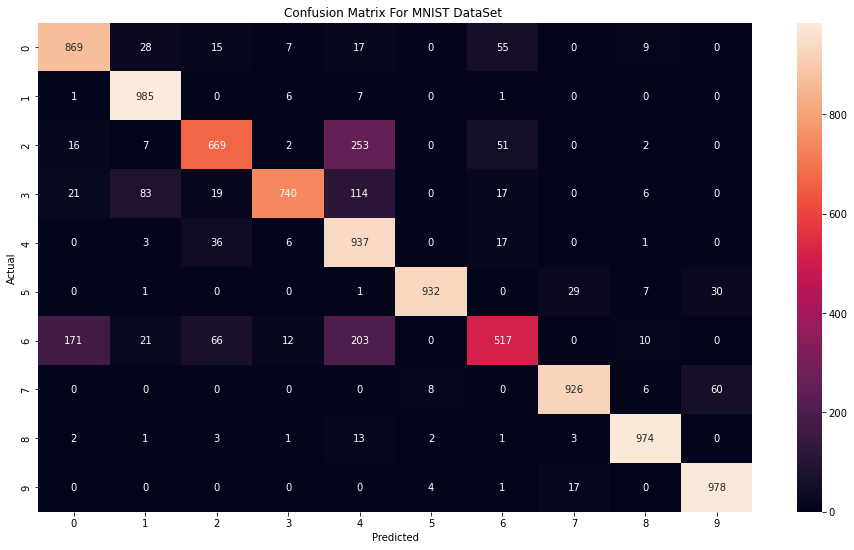

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,9))
y_pred_2_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_2_labels)
s=sns.heatmap(cm, annot=True, fmt='d')
s.set_title('Confusion Matrix For MNIST DataSet ')
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [38]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_2_labels)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1000
           1       0.87      0.98      0.93      1000
           2       0.83      0.67      0.74      1000
           3       0.96      0.74      0.83      1000
           4       0.61      0.94      0.74      1000
           5       0.99      0.93      0.96      1000
           6       0.78      0.52      0.62      1000
           7       0.95      0.93      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.92      0.98      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



In [39]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_2_labels,average='micro')

0.8527

In [40]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_2_labels,average='micro')

0.8527

In [41]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_2_labels,average='micro')

0.8527

# MODEL 3

In [42]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
history= model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 9s 12ms/step - loss: 0.8702 - accuracy: 0.7122 - val_loss: 0.7161 - val_accuracy: 0.7492
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.7015 - accuracy: 0.7494 - val_loss: 0.6728 - val_accuracy: 0.7618
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6819 - accuracy: 0.7558 - val_loss: 0.6479 - val_accuracy: 0.7624
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6563 - accuracy: 0.7688 - val_loss: 0.6379 - val_accuracy: 0.7762
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6847 - accuracy: 0.7452 - val_loss: 0.6944 - val_accuracy: 0.7542
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6718 - accuracy: 0.7490 - val_loss: 0.6771 - val_accuracy: 0.7585
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6681 - accuracy: 0.7520 - val_loss: 0.6479 - val_accuracy: 0.7653
Epoch

In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.7586


[0.6570824980735779, 0.7585999965667725]

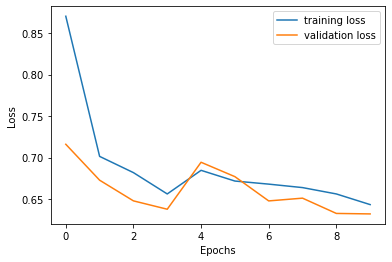

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("training loss","validation loss"))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

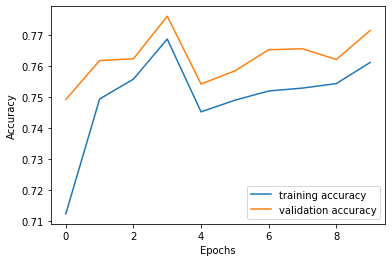

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("training accuracy","validation accuracy"))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [49]:
y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix For MNIST DataSet ')

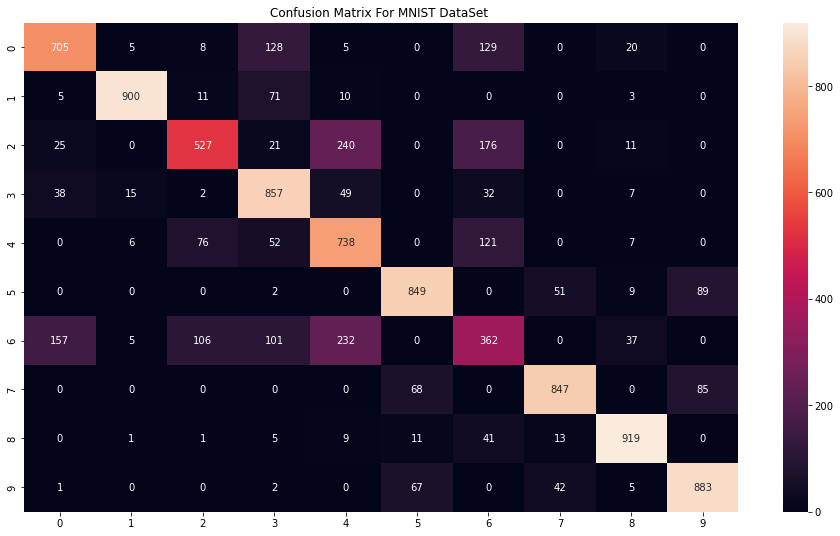

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)
s=sns.heatmap(cm, annot=True, fmt='d')
s.set_title('Confusion Matrix For MNIST DataSet ')

In [51]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.97      0.90      0.93      1000
           2       0.72      0.53      0.61      1000
           3       0.69      0.86      0.77      1000
           4       0.58      0.74      0.65      1000
           5       0.85      0.85      0.85      1000
           6       0.42      0.36      0.39      1000
           7       0.89      0.85      0.87      1000
           8       0.90      0.92      0.91      1000
           9       0.84      0.88      0.86      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [52]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_labels,average='micro')

0.7587

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_labels,average='micro')

0.7587

In [54]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_labels,average='micro')

0.7587

# MODEL 4

In [55]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
history= model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 3.3386 - accuracy: 0.6974 - val_loss: 0.9127 - val_accuracy: 0.7648
Epoch 2/10
750/750 [==============================] - 1s 2ms/step - loss: 0.7163 - accuracy: 0.7798 - val_loss: 0.6979 - val_accuracy: 0.7883
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5881 - accuracy: 0.8052 - val_loss: 0.5938 - val_accuracy: 0.7982
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5347 - accuracy: 0.8139 - val_loss: 0.5580 - val_accuracy: 0.8123
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.5026 - accuracy: 0.8229 - val_loss: 0.5064 - val_accuracy: 0.8234
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4826 - accuracy: 0.8282 - val_loss: 0.5625 - val_accuracy: 0.8007
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.4783 - accuracy: 0.8293 - val_loss: 0.4853 - val_accuracy: 0.8350
Epoch 

In [59]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5644 - accuracy: 0.8206


[0.5644428730010986, 0.8205999732017517]

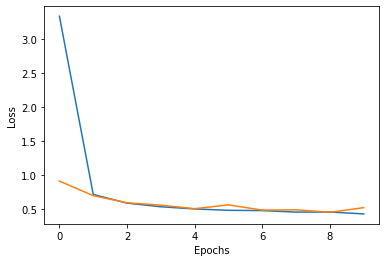

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

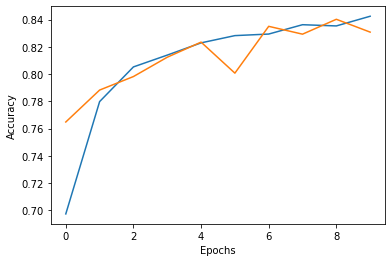

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [62]:
y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Confusion Matrix For MNIST DataSet ')

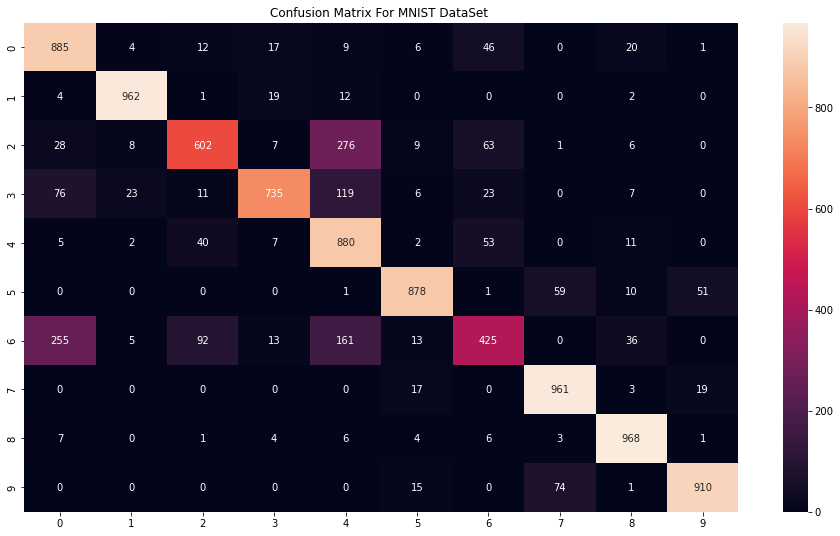

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)
s=sns.heatmap(cm, annot=True, fmt='d')
s.set_title('Confusion Matrix For MNIST DataSet ')

In [64]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred_labels)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.89      0.78      1000
           1       0.96      0.96      0.96      1000
           2       0.79      0.60      0.68      1000
           3       0.92      0.73      0.82      1000
           4       0.60      0.88      0.71      1000
           5       0.92      0.88      0.90      1000
           6       0.69      0.42      0.53      1000
           7       0.88      0.96      0.92      1000
           8       0.91      0.97      0.94      1000
           9       0.93      0.91      0.92      1000

    accuracy                           0.82     10000
   macro avg       0.83      0.82      0.82     10000
weighted avg       0.83      0.82      0.82     10000



In [65]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_labels,average='micro')

0.8206

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_labels,average='micro')

0.8206

In [67]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_labels,average='micro')

0.8206

# MODEL 5

In [68]:
model_5 = Sequential()
model_5.add(Flatten(input_shape=(28,28)))
model_5.add(Dense(64,activation='relu'))
model_5.add(Dense(32,activation='relu'))
model_5.add(Dense(16,activation='relu'))
model_5.add(Dense(10,activation='softmax'))

In [69]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_5.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [71]:
history= model_5.fit(X_train_scaled,y_train,batch_size=64,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 2s 2ms/step - loss: 0.6107 - accuracy: 0.7863 - val_loss: 0.4755 - val_accuracy: 0.8303
Epoch 2/30
750/750 [==============================] - 2s 2ms/step - loss: 0.4219 - accuracy: 0.8506 - val_loss: 0.3968 - val_accuracy: 0.8631
Epoch 3/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3789 - accuracy: 0.8643 - val_loss: 0.3858 - val_accuracy: 0.8647
Epoch 4/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3532 - accuracy: 0.8725 - val_loss: 0.3737 - val_accuracy: 0.8667
Epoch 5/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3333 - accuracy: 0.8793 - val_loss: 0.3668 - val_accuracy: 0.8648
Epoch 6/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3182 - accuracy: 0.8837 - val_loss: 0.3369 - val_accuracy: 0.8788
Epoch 7/30
750/750 [==============================] - 2s 2ms/step - loss: 0.3036 - accuracy: 0.8885 - val_loss: 0.3473 - val_accuracy: 0.8744
Epoch 

In [72]:
model_5.evaluate(X_test_scaled,y_test)


313/313 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8706


[0.40947967767715454, 0.8705999851226807]

In [73]:
model_5.predict(X_test_scaled)

313/313 [==============================] - 0s 1ms/step


array([[4.7591536e-07, 5.8004156e-07, 2.0078666e-07, ..., 1.6327532e-03,
        1.8609175e-09, 9.9835676e-01],
       [8.0697077e-07, 1.1192935e-10, 9.9279857e-01, ..., 8.2999495e-17,
        3.0715906e-08, 4.1796446e-16],
       [6.7692526e-13, 1.0000000e+00, 3.2349798e-15, ..., 4.4750330e-27,
        1.2879188e-25, 3.8614495e-17],
       ...,
       [1.1477103e-06, 2.5978161e-17, 6.5405417e-05, ..., 5.3829660e-07,
        9.9988401e-01, 8.1319862e-10],
       [4.6394374e-11, 9.9999940e-01, 2.1737350e-11, ..., 1.4753294e-22,
        7.5885442e-18, 1.9542111e-14],
       [1.9323989e-12, 9.7863659e-17, 1.2403605e-10, ..., 2.4179644e-03,
        4.6960486e-07, 2.9166605e-07]], dtype=float32)

In [74]:
y_pred_5=model_5.predict(X_test).round(2)

313/313 [==============================] - 0s 951us/step


In [75]:
y_pred_5

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
np.argmax(model_5.predict(X_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

Text(123.0, 0.5, 'Actual')

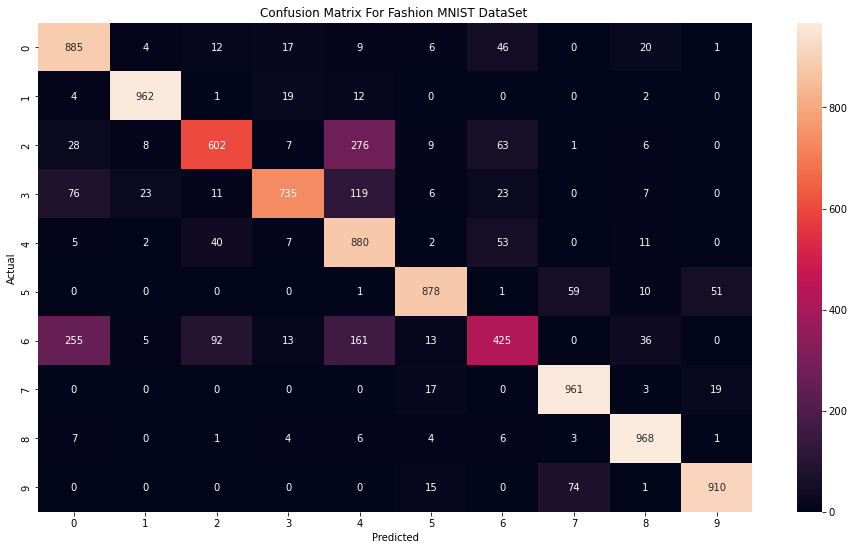

In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(16,9))
y_pred_5_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_5_labels)
s=sns.heatmap(cm, annot=True, fmt='d')
s.set_title('Confusion Matrix For Fashion MNIST DataSet ')
plt.xlabel("Predicted")
plt.ylabel("Actual")

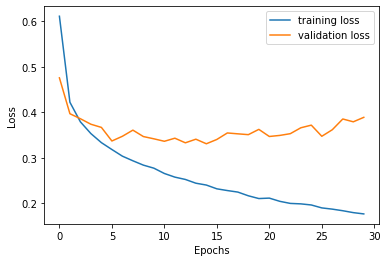

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("training loss","validation loss"))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

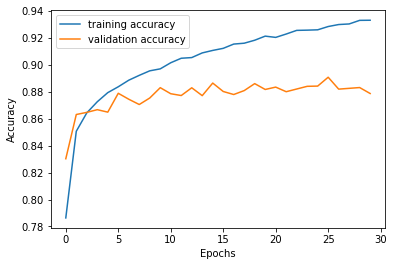

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("training accuracy","validation accuracy"))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [80]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_labels,average='micro')

0.8206

In [81]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred_labels,average='micro')

0.8206

In [82]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred_labels,average='micro')

0.8206